# Estimation of Obesity Levels Based On Eating Habits and Physical Condition

## About dataset columns

`Gender`\
`Age	`\
`Height	`\
`Weight	`\
`family_history_with_overweight` Has a family member suffered or suffers from overweight?\
`FAVC`	Do you eat high caloric food frequently?\
`FCVC`	Do you usually eat vegetables in your meals?\
`NCP`	How many main meals do you have daily?\
`CAEC`	Do you eat any food between meals?

`SMOKE`	Do you smoke?\
`CH2O`  How much water do you drink daily?\	
`SCC`	Do you monitor the calories you eat daily?\
`FAF`	How often do you have physical activity?\
`TUE`	How much time do you use technological devices such as cell phone, videogames, television, computer and others?\
`CALC`		How often do you drink alcohol?\
`MTRANS`	Which transportation do you usually use?\
`NObeyesdad` Obesity level		

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('data.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
for col in df.columns:
    df[col]=LabelEncoder().fit_transform(df[col])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,404,295,245,1,0,170,477,2,0,549,0,0,840,3,3,1
1,0,404,28,173,1,0,809,477,2,1,1267,1,1189,0,2,3,1
2,1,701,1306,382,1,0,170,477,2,0,549,0,1071,840,1,3,1
3,1,1021,1306,643,0,0,809,477,2,0,549,0,1071,0,1,4,5
4,1,578,1202,692,0,0,170,0,2,0,549,0,0,0,2,3,6


In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# RandomForest classifier

accuracy_score :  0.9456264775413712
classification_report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.86      0.89      0.87        62
           2       0.99      0.96      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.86      0.86      0.86        56
           6       0.96      0.96      0.96        50

    accuracy                           0.95       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.95      0.95       423



<Axes: >

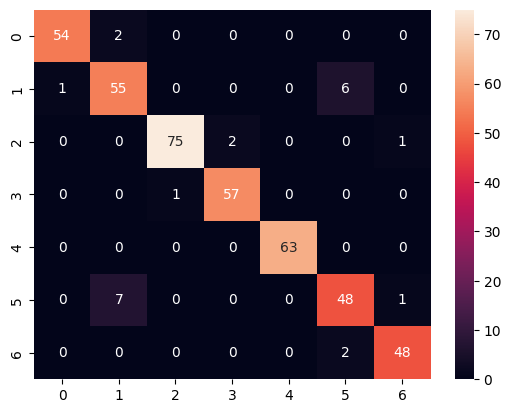

In [9]:
X=df.drop('NObeyesdad',axis=1)
y=df['NObeyesdad']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('accuracy_score : ',accuracy_score(y_test,y_pred))
print('classification_report : \n',classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# RandomForest Regression

In [10]:
X=df.drop('NCP',axis=1)
y=df['NCP']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('mean_squared_error : ',mean_squared_error(y_test,y_pred))
print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred))
print('r2_score : ',r2_score(y_test,y_pred))

mean_squared_error :  11961.707076122932
mean_absolute_error :  67.00591016548464
r2_score :  0.6158130012148221
